# CHALLENGE 2: LSTM

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model

In [2]:
# Reuseable visualizatoin function
def visualize_plot(x, y=None, x_label='', y_label='', title='', labels=None, markers=None, legend=True, grid=True, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    if y is not None:
        if isinstance(x, list) and isinstance(y, list) and len(x) == len(y):  # Multiple series
            for i in range(len(y)):
                plt.plot(x[i], y[i], label=labels[i] if labels else None, marker=markers[i] if markers else None)
        else:  # Single series
            plt.plot(x, y, label=labels[0] if labels else None, marker=markers[0] if markers else None)
    else:  # Plot only x if y is None
        plt.plot(x)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    if legend and labels:
        plt.legend()
    if grid:
        plt.grid(True)
    plt.show()


# Helper function to prepare windowed datasets
def windowed_dataset(series, window_size, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1])) # Split into input (x) and target (y)
    dataset = dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(1) # Shuffle, batch, and prefetch
    return dataset

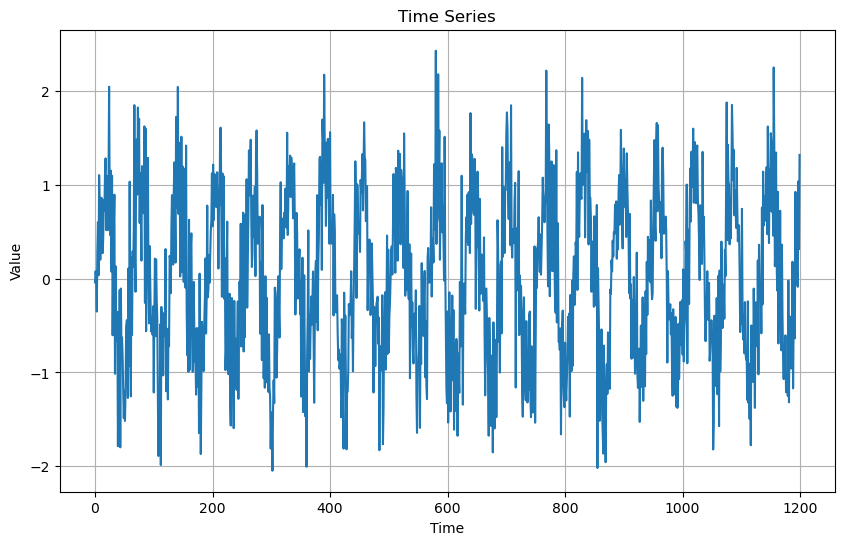

In [3]:
# Create synthetic time series data
def generate_time_series():
    time = np.arange(1200)
    series = np.sin(0.1 * time) + np.random.normal(scale=0.5, size=1200)
    return time, series

time, series = generate_time_series()

# Plot the synthetic data
visualize_plot(
    time, series,
    x_label='Time', y_label='Value',
    title = 'Time Series',
    grid=True
)

In [4]:
# Split the data into training and validation sets
split_time = 1000
x_train = series[:split_time]
x_valid = series[split_time:]

# Visualize the split


In [5]:
# Window size and batch size
window_size = 20
batch_size = 32

# Create windowed datasets for both training and validation
train_dataset = windowed_dataset(x_train, window_size, batch_size)
valid_dataset = windowed_dataset(x_valid, window_size, batch_size)

# Build the LSTM model using Functional API
inputs = layers.Input(shape=[None], name="Input_Layer")
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), name='Expand_Dims')(inputs)
x = layers.LSTM(32, return_sequences=True)(x)
x = layers.LSTM(32)(x)
x = layers.Dense(1, name='Dense_Layer')(x)
outputs = layers.Lambda(lambda x: x * 100.0, name='Scale_Outpus')(x)


# Create the model
lstm_model = Model(inputs=inputs, outputs=outputs, name='Functional_LSTM')

# Compile the model
lstm_model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9),  metrics=['mse'])


# Train the model
history = lstm_model.fit(
    train_dataset.repeat(),
    epochs=100,
    validation_data=valid_dataset.repeat(),
    steps_per_epoch=len(x_train) // batch_size,
    validation_steps=len(x_valid) // batch_size
)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 14.2612 - mse: 14.2612 - val_loss: 1.9344 - val_mse: 1.9344
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2909 - mse: 1.2909 - val_loss: 0.5781 - val_mse: 0.5781
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7145 - mse: 0.7145 - val_loss: 0.5736 - val_mse: 0.5736
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6542 - mse: 0.6542 - val_loss: 0.5446 - val_mse: 0.5446
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6482 - mse: 0.6482 - val_loss: 0.5263 - val_mse: 0.5263
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6445 - mse: 0.6445 - val_loss: 0.5115 - val_mse: 0.5115
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5825 - mse: 0.5825 - val_loss: 0.5024 - val_mse: 0.5024
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6116 - mse: 0.6116 - val_loss: 0.4995 - val_mse: 0.4995
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5

Epoch 55/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3754 - mse: 0.3754 - val_loss: 0.3253 - val_mse: 0.3253
Epoch 56/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3710 - mse: 0.3710 - val_loss: 0.3167 - val_mse: 0.3167
Epoch 57/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3748 - mse: 0.3748 - val_loss: 0.3118 - val_mse: 0.3118
Epoch 58/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3923 - mse: 0.3923 - val_loss: 0.3120 - val_mse: 0.3120
Epoch 59/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3720 - mse: 0.3720 - val_loss: 0.3388 - val_mse: 0.3388
Epoch 60/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3800 - mse: 0.3800 - val_loss: 0.3102 - val_mse: 0.3102
Epoch 61/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3719 - mse: 0.3719 - val_loss: 0.3105 - val_mse: 0.3105
Epoch 62/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3712 - mse: 0.3712 - val_loss: 0.3077 - val_mse: 0.3077
Epoch 63/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - lo

In [6]:
value = 1e-6
print(f"{value:.6f}")

0.000001


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


2024-11-29 10:18:45.468584: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


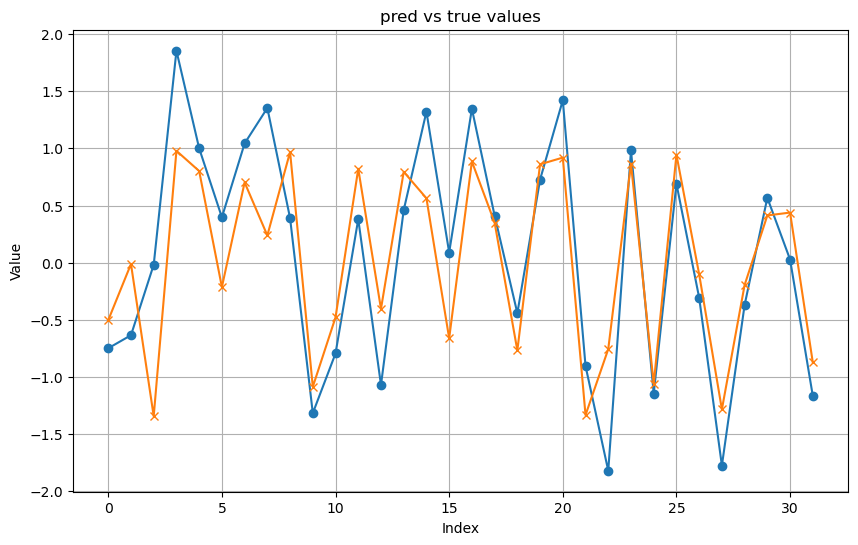

In [7]:
# Make predictions
for input_batch, target_batch in valid_dataset.take(1):
    predictions = lstm_model.predict(input_batch).flatten()
    true_values = target_batch.numpy().flatten()

# Visualize predictions vs. true values
visualize_plot(
    [range(len(true_values)), range(len(predictions))],
    [true_values, predictions],
    x_label='Index', y_label='Value',
    title='pred vs true values',
    markers=['o','x']
)